In [2]:
from psaw import PushshiftAPI
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import datetime

api = PushshiftAPI()

In [3]:
my_subreddit = 'wallstreetbets'
query = 'GME|gamestop'

date1 = int(datetime.datetime(2020,1,1).timestamp())
date2 = int(datetime.datetime(2021,1,25).timestamp())

In [4]:
subs = api.search_submissions(subreddit=my_subreddit,
                              after=date1,
                              before=date2,
                              q=query)

In [5]:
df_subs = pd.DataFrame([obj.d_ for obj in subs])


C:\Users\niels\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [14]:
subs_keys = ['title', 'id', 'score', 'created_utc', 'author', 'num_comments']

df_subs2save = df_subs[subs_keys]

df_subs2save.to_csv('data_subs.csv', index=False)

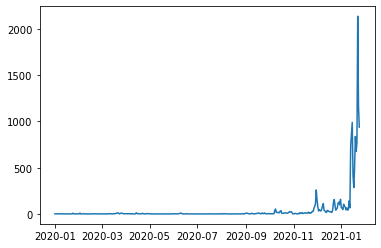

In [15]:
time_stamps = [datetime.datetime.utcfromtimestamp(time) for time in df_subs['created_utc']]
date_sum = pd.DataFrame(np.ones(len(df_subs)), index=time_stamps).resample('1440T').sum()

plt.plot(date_sum)

In [16]:
len(set(df_subs.author_fullname)), len(df_subs)

(9375, 14715)

### Excercise 3

In [161]:
old_df = pd.read_csv('data_comments.csv')
last_id = old_df['post_link_id'][len(old_df) - 1]

last_id_index = np.where(df_subs['id'] == last_id)[0][0]

61

In [164]:
import os

keys_comments = ['id', 'link_id', 'score', 'created_utc', 'author', 'parent_id']
last_id_index = 0

if not os.path.exists('./data_comments.csv'):
    df_comments = pd.DataFrame(columns=keys_comments + ['post_link_id'])
    df_comments.to_csv('data_comments.csv', index=False)
else:
    old_df = pd.read_csv('data_comments.csv')
    last_id = old_df['post_link_id'][len(old_df) - 1]
    last_id_index = np.where(df_subs['id'] == last_id)[0][0]
    

for link_id in tqdm(df_subs['id'][last_id_index:]):
    comments = api.search_comments(subreddit='wallstreetbets',
                                    link_id=link_id)
    
    temp_df = pd.DataFrame([ {key: obj.d_[key] for key in keys_comments} for obj in comments])
    temp_df['post_link_id'] = [link_id] * len(temp_df)
    
    temp_df.to_csv('data_comments.csv', mode='a', index=False, header=False)


100%|██████████| 14649/14649 [8:17:33<00:00,  2.04s/it]     
